In [1]:
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [2]:
def load_photos(directory):
    images = []
    labels_speed = []
    labels_dir = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_dir = float(name.split('_')[1])
        value_speed = float(name.split('_')[0])
        labels_dir.append(value_dir)
        labels_speed.append(value_speed)
        images.append(image)
    return images, labels_speed, labels_dir

In [3]:
dataset = "../../../../speed"

In [10]:
# load images from both train and test groups
directory = dataset+'/Train'
images, labels_speed, labels_dir = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 1278


In [11]:
#Normalise images
images = np.array(images)
images /= 255.0

In [12]:
#convert datas to dummyvalues
labels_dir = np.array(pd.get_dummies(labels_dir))
labels_speed = np.array(pd.get_dummies(labels_speed))

(array([0, 0, 1], dtype=uint8),
 array([1, 0], dtype=uint8),
 <matplotlib.image.AxesImage at 0x1c6e9f96208>)

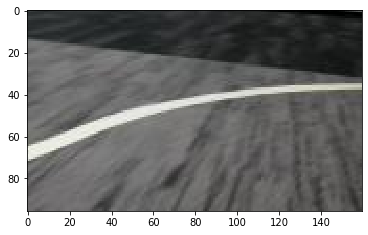

In [13]:
labels_dir[42], labels_speed[42], plt.imshow(images[42])

In [14]:
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers
import keras.callbacks

In [15]:
#from keras.models import load_model
#model = load_model("model_bigrace_original_5.h5")

In [16]:
'''
Model from PatateV2
'''

K.clear_session()
############################################################# 

img_in = Input(shape=(96, 160, 3), name='img_in')
x = img_in

x = Convolution2D(2, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Convolution2D(4, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Convolution2D(8, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.5)(x)

x = Flatten(name='flattened')(x)

x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

out_dir = Dense(3, activation='softmax')(x)
out_speed = Dense(2, activation='softmax')(x)


# Compile Model
model = Model(inputs=[img_in], outputs=[out_speed, out_dir])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

W1130 11:15:40.538967 11816 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:88: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W1130 11:15:40.539965 11816 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:91: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1130 11:15:40.552723 11816 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1130 11:15:40.552723 11816 deprecation_wrapper.py:119] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:507

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 96, 160, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 46, 78, 2)    150         img_in[0][0]                     
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 46, 78, 2)    8           conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 46, 78, 2)    0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [17]:
model_name="model_race_speed.h5"

In [18]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [19]:
h = model.fit(images, [labels_speed, labels_dir], batch_size=64, epochs=100, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

W1130 11:16:06.545308 11816 deprecation.py:323] From c:\users\rock_\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1022 samples, validate on 256 samples
Epoch 1/100
1022/1022 [==============================] - 4s 3ms/step - loss: 2.3220 - dense_4_loss: 0.9273 - dense_3_loss: 1.3947 - dense_4_acc: 0.5049 - dense_3_acc: 0.3483 - val_loss: 1.7399 - val_dense_4_loss: 0.6602 - val_dense_3_loss: 1.0798 - val_dense_4_acc: 0.5977 - val_dense_3_acc: 0.4609

Epoch 00001: val_loss improved from inf to 1.73993, saving model to model_race_speed.h5
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.7714 - dense_4_loss: 0.6678 - dense_3_loss: 1.1036 - dense_4_acc: 0.6350 - dense_3_acc: 0.4746 - val_loss: 1.4157 - val_dense_4_loss: 0.5381 - val_dense_3_loss: 0.8777 - val_dense_4_acc: 0.7188 - val_dense_3_acc: 0.7148

Epoch 00002: val_loss improved from 1.73993 to 1.41574, saving model to model_race_speed.h5
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.4342 - dense_4_loss: 0.5368 - dense_3_loss: 0.8974 - dense_4_acc: 0.7319 - dense_3_acc: 0.6106

1022/1022 [==============================] - 2s 2ms/step - loss: 0.5483 - dense_4_loss: 0.2937 - dense_3_loss: 0.2546 - dense_4_acc: 0.8659 - dense_3_acc: 0.9178 - val_loss: 0.5835 - val_dense_4_loss: 0.3426 - val_dense_3_loss: 0.2409 - val_dense_4_acc: 0.8359 - val_dense_3_acc: 0.9180

Epoch 00023: val_loss did not improve
Epoch 24/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5080 - dense_4_loss: 0.2753 - dense_3_loss: 0.2327 - dense_4_acc: 0.8885 - dense_3_acc: 0.9217 - val_loss: 0.5736 - val_dense_4_loss: 0.3372 - val_dense_3_loss: 0.2364 - val_dense_4_acc: 0.8594 - val_dense_3_acc: 0.9102

Epoch 00024: val_loss did not improve
Epoch 25/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5133 - dense_4_loss: 0.2706 - dense_3_loss: 0.2427 - dense_4_acc: 0.8885 - dense_3_acc: 0.9149 - val_loss: 0.7903 - val_dense_4_loss: 0.4035 - val_dense_3_loss: 0.3868 - val_dense_4_acc: 0.8047 - val_dense_3_acc: 0.8359

Epoch 00025: val_loss did not impr

1022/1022 [==============================] - 2s 2ms/step - loss: 0.3913 - dense_4_loss: 0.2177 - dense_3_loss: 0.1735 - dense_4_acc: 0.9061 - dense_3_acc: 0.9403 - val_loss: 0.4289 - val_dense_4_loss: 0.2641 - val_dense_3_loss: 0.1648 - val_dense_4_acc: 0.9180 - val_dense_3_acc: 0.9414

Epoch 00046: val_loss improved from 0.43476 to 0.42892, saving model to model_race_speed.h5
Epoch 47/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3829 - dense_4_loss: 0.2161 - dense_3_loss: 0.1668 - dense_4_acc: 0.9080 - dense_3_acc: 0.9384 - val_loss: 0.4278 - val_dense_4_loss: 0.2699 - val_dense_3_loss: 0.1579 - val_dense_4_acc: 0.9141 - val_dense_3_acc: 0.9453

Epoch 00047: val_loss improved from 0.42892 to 0.42782, saving model to model_race_speed.h5
Epoch 48/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3444 - dense_4_loss: 0.1882 - dense_3_loss: 0.1562 - dense_4_acc: 0.9178 - dense_3_acc: 0.9501 - val_loss: 0.4590 - val_dense_4_loss: 0.2722 - val_

1022/1022 [==============================] - 2s 2ms/step - loss: 0.2753 - dense_4_loss: 0.1607 - dense_3_loss: 0.1145 - dense_4_acc: 0.9364 - dense_3_acc: 0.9550 - val_loss: 0.7454 - val_dense_4_loss: 0.3833 - val_dense_3_loss: 0.3621 - val_dense_4_acc: 0.8867 - val_dense_3_acc: 0.8672

Epoch 00069: val_loss did not improve
Epoch 70/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2787 - dense_4_loss: 0.1671 - dense_3_loss: 0.1116 - dense_4_acc: 0.9295 - dense_3_acc: 0.9618 - val_loss: 0.4639 - val_dense_4_loss: 0.3153 - val_dense_3_loss: 0.1486 - val_dense_4_acc: 0.9102 - val_dense_3_acc: 0.9648

Epoch 00070: val_loss did not improve
Epoch 71/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2840 - dense_4_loss: 0.1571 - dense_3_loss: 0.1269 - dense_4_acc: 0.9413 - dense_3_acc: 0.9599 - val_loss: 0.4605 - val_dense_4_loss: 0.2905 - val_dense_3_loss: 0.1700 - val_dense_4_acc: 0.9102 - val_dense_3_acc: 0.9414

Epoch 00071: val_loss did not impr

1022/1022 [==============================] - 3s 3ms/step - loss: 0.2202 - dense_4_loss: 0.1428 - dense_3_loss: 0.0775 - dense_4_acc: 0.9413 - dense_3_acc: 0.9726 - val_loss: 0.4658 - val_dense_4_loss: 0.3071 - val_dense_3_loss: 0.1587 - val_dense_4_acc: 0.9258 - val_dense_3_acc: 0.9648

Epoch 00093: val_loss did not improve
Epoch 94/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2601 - dense_4_loss: 0.1588 - dense_3_loss: 0.1012 - dense_4_acc: 0.9413 - dense_3_acc: 0.9697 - val_loss: 0.4146 - val_dense_4_loss: 0.2619 - val_dense_3_loss: 0.1526 - val_dense_4_acc: 0.9219 - val_dense_3_acc: 0.9531

Epoch 00094: val_loss did not improve
Epoch 95/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.2170 - dense_4_loss: 0.1297 - dense_3_loss: 0.0873 - dense_4_acc: 0.9472 - dense_3_acc: 0.9716 - val_loss: 0.4608 - val_dense_4_loss: 0.2850 - val_dense_3_loss: 0.1758 - val_dense_4_acc: 0.9336 - val_dense_3_acc: 0.9570

Epoch 00095: val_loss did not impr

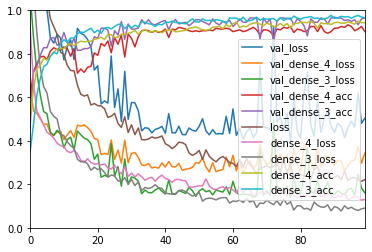

In [20]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))